## Procesado de variables


In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
datos = pd.read_csv("../../RESOURCES/datos_procesamiento.csv")
datos.head()

,col_inexistente1,col2,col3,col_outliers,col_outliers2,col_categorica,col_ordinal,col_texto
0,59.0,52.0,2.232832,-50,0.771666,ratón,muy bien,Tenía en su casa una ama que pasaba de los cua...
1,31.0,74.0,0.906147,-5,1.068558,elefante,regular,"El resto della concluían sayo de velarte, calz..."
2,81.0,28.0,0.626750,-32,0.846396,ratón,muy mal,"El resto della concluían sayo de velarte, calz..."
3,34.0,16.0,0.816738,-84,0.637381,gato,mal,"Una olla de algo más vaca que carnero, salpicó..."
4,32.0,28.0,0.571131,65,4.540614,gato,bien,Tenía en su casa una ama que pasaba de los cua...


In [8]:
datos.dtypes

col_inexistente1    float64
col2                float64
col3                float64
col_outliers          int64
col_outliers2       float64
col_categorica       object
col_ordinal          object
col_texto            object
dtype: object

In [9]:
datos.shape

(1000, 8)

## Variables numéricas

### Imputacion de datos

In [10]:
from sklearn import preprocessing

In [11]:
#Seleccionamos todas aquellas columnas que sean int o float, quitando asi las de string
var_numericas_df = datos.select_dtypes([int,float])
var_numericas_df.columns

Index(['col_inexistente1', 'col2', 'col3', 'col_outliers', 'col_outliers2'], dtype='object')

In [12]:
#vamos a ver cuantos casos son NaN 
var_numericas_df[var_numericas_df.isnull().any(axis=1)].shape

(96, 5)

In [13]:
var_numericas_df[var_numericas_df.isnull().any(axis=1)].head()

,col_inexistente1,col2,col3,col_outliers,col_outliers2
9,NaN,53.0,2.270999,62,1.067230
10,NaN,99.0,1.394209,98,4.145716
16,NaN,50.0,0.437365,59,20.549474
17,NaN,73.0,0.324893,98,0.761684
23,NaN,85.0,3.664671,-48,3.154153


In [14]:
#mediante el imputador preprocesamos el dataset mediante una estrategia, en este caso la media.
imputador = preprocessing.Imputer(strategy="mean")

/opt/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [15]:
var_numericas_imputadas = imputador.fit_transform(var_numericas_df)

In [16]:
var_numericas_imputadas

array([[ 59.        ,  52.        ,   2.23283208, -50.        ,
          0.77166646],
       [ 31.        ,  74.        ,   0.90614714,  -5.        ,
          1.06855838],
       [ 81.        ,  28.        ,   0.62675042, -32.        ,
          0.84639576],
       ...,
       [ 19.        ,  53.        ,   0.73723413,  73.        ,
          1.34525201],
       [ 88.        ,  94.        ,   0.76008706,  68.        ,
          1.3692463 ],
       [ 94.        ,  56.        ,   1.2299403 ,  61.        ,
          0.94395714]])

In [17]:
#convertimos el array de numpy del imputador a un dataframe
var_numericas_imputadas_df = pd.DataFrame(
    var_numericas_imputadas,index=var_numericas_df.index,columns=var_numericas_df.columns
)
var_numericas_imputadas_df.head(10)

,col_inexistente1,col2,col3,col_outliers,col_outliers2
0,59.000000,52.0,2.232832,-50.0,0.771666
1,31.000000,74.0,0.906147,-5.0,1.068558
2,81.000000,28.0,0.626750,-32.0,0.846396
3,34.000000,16.0,0.816738,-84.0,0.637381
4,32.000000,28.0,0.571131,65.0,4.540614
5,81.000000,4.0,1.618844,51.0,0.812940
6,57.000000,31.0,0.167880,78.0,1.235137
7,34.000000,20.0,20.229813,93.0,1.283176
8,37.000000,96.0,2.407978,54.0,1.298613
9,48.382743,53.0,2.270999,62.0,1.067230


In [18]:
#Comprobamos que ahora ya no hay variables nulas
var_numericas_imputadas_df[var_numericas_imputadas_df.isnull().any(axis=1)].shape

(0, 5)

### Estandarizacion
El proceso de estandarizacion es un proceso requerido en el que el objetivo es obtener una variable con media 0 y desviacion estandar 1

In [19]:
var_numericas_df.columns

Index(['col_inexistente1', 'col2', 'col3', 'col_outliers', 'col_outliers2'], dtype='object')

In [20]:
#ibtenemos la media de cada una de las columnasabs
var_numericas_df.mean()

col_inexistente1     48.382743
col2                 49.660000
col3                  1.466095
col_outliers          4.253000
col_outliers2       131.193340
dtype: float64

In [21]:
#obtenemos la desviacion estandar de cada una de las columnas
var_numericas_df.std()

col_inexistente1      27.987174
col2                  28.272668
col3                   1.732358
col_outliers          78.145901
col_outliers2       3401.164776
dtype: float64

Ahora procedemos a estandarizar el dataframe, para ello utilizaremos una herramienta de sklearn: **StandardScaler**

In [22]:
escalador = preprocessing.StandardScaler()
var_numericas_imputadas_escalado_standard = escalador.fit_transform(var_numericas_imputadas)

In [23]:
escalador.mean_

array([ 48.38274336,  49.66      ,   1.46609489,   4.253     ,
       131.19333968])

In [24]:
#Observamos la media despues de la estandarizacion, en la que sus campos son muy proximos a 0
var_numericas_imputadas_escalado_standard.mean(axis=0)

array([-5.86197757e-17,  1.26121336e-16, -3.81916720e-17,  3.55271368e-18,
       -3.55271368e-18])

In [25]:
#Observamos la desviacion estandard y comprobamos que es 1 
var_numericas_imputadas_escalado_standard.std(axis=0)

array([1., 1., 1., 1., 1.])

In [26]:
#Observamos la primera observacion
var_numericas_imputadas_escalado_standard[0]

array([ 0.39921733,  0.08280686,  0.44281884, -0.69460006, -0.03836537])

Para aquellos datasets con valores muy extremos, esta herramienta no sería la mas apropiada y sería más optimo usar estimadores mas robustos (menos sensibles a los Outliers). Para ello podemos emplear **RobustScaler** que funciona substrayendo la mediana y escalando mediante el rango intercuartil (IQR).
(Este escalador robusto funciona igual que el anterior, salvo por la diferencia de que en vez de la media utiliza la mediana y en ver de la desviacion estandard utiliza el rango intercuartil)

In [27]:
escalador_robusto = preprocessing.RobustScaler()
var_numericas_imputadas_escalado_robusto = escalador_robusto.fit_transform(var_numericas_imputadas)

In [28]:
var_numericas_imputadas_escalado_robusto.mean(axis=0)

array([-3.81916720e-17, -2.85106383e-02,  4.01958704e-01,  3.04018692e-02,
        7.03130782e+01])

In [29]:
var_numericas_imputadas_escalado_robusto.std(axis=0)

array([6.33218559e-01, 6.01245275e-01, 1.38651621e+00, 7.29970260e-01,
       1.83690817e+03])

### Escalado a un rango especifico.
Hay casos en los que en vez de estandarizar el modelo nos interesa mas ajustar los datos a un rango especifico (generalmente -1,1 o 0,1). Para ello utilizamos la herramienta **MinMaxScaler** que hace escalado minmax.
Tambien podemos utilizar el MaxAbsScaler que simplemente divide cada valor de una variable por su valor maximo (y por tanto convierte el valor maximo a 1)

In [30]:
#comprobamos el valor minimo antes del escalado
var_numericas_imputadas.min()

-100.0

In [31]:
#comprobamos el valor maximo antes del escalado
var_numericas_imputadas.max()

107357.85777352

In [32]:
#escalamos con la libreria preprocessing y la herramienta MinMaxScaler
escalador_minmax = preprocessing.MinMaxScaler()
var_numericas_imputadas_escalado_minmax = escalador_minmax.fit_transform(var_numericas_imputadas)

In [33]:
#comprobamos el minimo despues de escalarlo
var_numericas_imputadas_escalado_minmax.min()

0.0

In [34]:
#comprobamos el maximo despues de escalarlo
var_numericas_imputadas_escalado_minmax.max()

1.0

In [35]:
#creamos ahora un escalador con la herramienta MaxAbsScaler
escalador_maxabs = preprocessing.MaxAbsScaler()
var_numericas_imputadas_escalado_maxabs = escalador_maxabs.fit_transform(var_numericas_imputadas)

In [36]:
#comprobamos los maximos tras aplicar el escalador MaxAbs
var_numericas_imputadas_escalado_maxabs.max()

1.0

In [37]:
#comprobamos los minimos tras aplicar el escalador MaxAbs y comprobamos que no se preocupa por el minimo y solo
#divide por el maximo
var_numericas_imputadas_escalado_maxabs.min()

-0.1122334455667789

Hay casos en los que es necesario tener observaciones con norma unitaria (norma L2 o euclidiana). Para estos casos se utilizará el método **normalizer**

In [38]:
normalizador = preprocessing.Normalizer()
var_numericas_imputadas_normal = normalizador.fit_transform(var_numericas_imputadas)

In [39]:
var_numericas_imputadas_normal[:1]

array([[ 0.63288908,  0.55780055,  0.02395144, -0.53634668,  0.00827761]])

In [42]:
np.linalg.norm(var_numericas_imputadas[1,:])

80.39877436664493

### Otras transformaciones
Para aquellos casos en los que queremos aplicar una función arbitraria a una variable podemos usar **FunctionTransformer**.
La variable *col3* no tiene una distribución normal, sino que tiene una asimetría muy marcada.

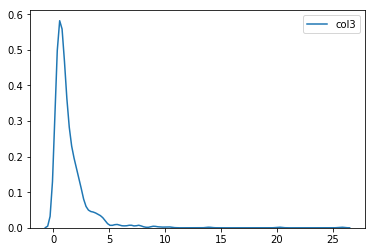

In [43]:
sns.kdeplot(datos.col3)

Una práctica muy frecuente es aplicar el logaritmo a dichas variables para convertirlas a variables con una distribución más normal.

In [48]:
from sklearn.preprocessing import FunctionTransformer
#la funcion np.log1p es para sumar siempre uno para evitar el logaritmo de 0 (que es infinito)
transformer = FunctionTransformer(np.log1p)

/opt/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


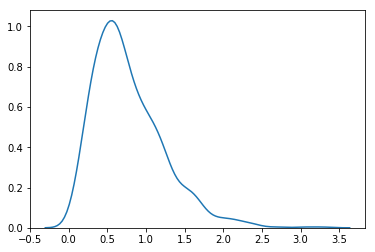

In [49]:
col3_transformada= transformer.transform(datos[["col3"]])
col3_transformada = col3_transformada.reshape(col3_transformada.shape[0],)
sns.kdeplot(col3_transformada)

Vemos que tras aplicar el transformador de FunctionTransformer aplicando como parámetro la funcion logaritmo de numpy el resgistro de *col3* está mucho más normalizado

### Variables Categóricas
Los modelos están diseñados para trabajar con variables numéricas. Esto implica que para poder entrenar los modelos con variables categóricas tenemos que convertirlas a números. Este proceso se le conoce como **codificación**(*encoding*).
Básicamente el proceso consiste en utilizar los registros de texto en valores ordinarios.

In [51]:
datos = pd.read_csv("../../RESOURCES/datos_procesamiento.csv")
datos.head()

,col_inexistente1,col2,col3,col_outliers,col_outliers2,col_categorica,col_ordinal,col_texto
0,59.0,52.0,2.232832,-50,0.771666,ratón,muy bien,Tenía en su casa una ama que pasaba de los cua...
1,31.0,74.0,0.906147,-5,1.068558,elefante,regular,"El resto della concluían sayo de velarte, calz..."
2,81.0,28.0,0.626750,-32,0.846396,ratón,muy mal,"El resto della concluían sayo de velarte, calz..."
3,34.0,16.0,0.816738,-84,0.637381,gato,mal,"Una olla de algo más vaca que carnero, salpicó..."
4,32.0,28.0,0.571131,65,4.540614,gato,bien,Tenía en su casa una ama que pasaba de los cua...


In [52]:
var_categoricas = datos[['col_categorica','col_ordinal']]

In [53]:
var_categoricas.head()

,col_categorica,col_ordinal
0,ratón,muy bien
1,elefante,regular
2,ratón,muy mal
3,gato,mal
4,gato,bien


ahora debemos 'separar' estos valores por valores numéricos. A este proceso en Scikit Learn se conoce como **LabelEncoder**. En nuestro caso, como no queremos que los animales tengan un valor 'real' numerico (que no pueda darse una situación de que un ratón más un gato es igual a un elefante por ejemplo) lo que haremos será emplear una técnica conocida como **OneHotEncoder**.



### LabelEncoder
Aplicamos un transformador LabelEncoder()

In [76]:
label_codificador_categorico=preprocessing.LabelEncoder()
label_codificador_categorico.fit_transform(datos.col_categorica)[:10]

array([3, 0, 3, 1, 1, 2, 2, 2, 0, 0])

### OneHotEncoder
Aplicamos un transformador OneHotEncoder()

In [77]:
ohcodificador = preprocessing.OneHotEncoder()

In [78]:
ohcodificador.fit(datos.col_categorica)

ValueError: Expected 2D array, got 1D array instead:
array=['ratón' 'elefante' 'ratón' 'gato' 'gato' 'perro' 'perro' 'perro'
 'elefante' 'elefante' 'perro' 'elefante' 'gato' 'ratón' 'gato' 'ratón'
 'elefante' 'ratón' 'ratón' 'elefante' 'ratón' 'ratón' 'ratón' 'gato'
 'gato' 'ratón' 'gato' 'elefante' 'gato' 'elefante' 'elefante' 'elefante'
 'elefante' 'ratón' 'elefante' 'gato' 'elefante' 'gato' 'gato' 'gato'
 'gato' 'ratón' 'elefante' 'gato' 'gato' 'perro' 'elefante' 'gato'
 'elefante' 'perro' 'ratón' 'perro' 'elefante' 'ratón' 'ratón' 'gato'
 'gato' 'elefante' 'ratón' 'perro' 'gato' 'gato' 'gato' 'gato' 'ratón'
 'elefante' 'elefante' 'perro' 'gato' 'ratón' 'perro' 'elefante' 'gato'
 'gato' 'ratón' 'ratón' 'elefante' 'perro' 'ratón' 'ratón' 'elefante'
 'gato' 'perro' 'ratón' 'gato' 'elefante' 'elefante' 'perro' 'perro'
 'perro' 'ratón' 'gato' 'ratón' 'gato' 'gato' 'elefante' 'gato' 'gato'
 'perro' 'perro' 'ratón' 'perro' 'gato' 'elefante' 'ratón' 'perro' 'gato'
 'gato' 'ratón' 'gato' 'perro' 'perro' 'perro' 'gato' 'perro' 'perro'
 'elefante' 'perro' 'ratón' 'gato' 'gato' 'gato' 'gato' 'ratón' 'ratón'
 'ratón' 'perro' 'elefante' 'elefante' 'perro' 'ratón' 'gato' 'elefante'
 'gato' 'ratón' 'ratón' 'elefante' 'gato' 'perro' 'ratón' 'gato'
 'elefante' 'elefante' 'elefante' 'elefante' 'perro' 'elefante' 'elefante'
 'gato' 'ratón' 'perro' 'perro' 'gato' 'perro' 'perro' 'elefante' 'gato'
 'perro' 'perro' 'perro' 'perro' 'gato' 'ratón' 'gato' 'gato' 'gato'
 'perro' 'ratón' 'ratón' 'elefante' 'ratón' 'ratón' 'elefante' 'elefante'
 'ratón' 'elefante' 'elefante' 'elefante' 'ratón' 'ratón' 'gato' 'perro'
 'elefante' 'elefante' 'gato' 'gato' 'perro' 'elefante' 'elefante'
 'elefante' 'ratón' 'perro' 'perro' 'gato' 'ratón' 'gato' 'perro' 'ratón'
 'elefante' 'ratón' 'ratón' 'gato' 'ratón' 'gato' 'ratón' 'elefante'
 'gato' 'gato' 'perro' 'elefante' 'perro' 'perro' 'gato' 'elefante'
 'elefante' 'elefante' 'gato' 'perro' 'gato' 'perro' 'elefante' 'elefante'
 'elefante' 'elefante' 'perro' 'gato' 'gato' 'elefante' 'ratón' 'perro'
 'perro' 'ratón' 'ratón' 'perro' 'perro' 'elefante' 'elefante' 'perro'
 'gato' 'perro' 'ratón' 'perro' 'ratón' 'gato' 'ratón' 'perro' 'elefante'
 'gato' 'gato' 'ratón' 'ratón' 'perro' 'gato' 'ratón' 'ratón' 'perro'
 'elefante' 'gato' 'ratón' 'perro' 'elefante' 'ratón' 'elefante' 'perro'
 'ratón' 'perro' 'perro' 'perro' 'ratón' 'ratón' 'ratón' 'perro'
 'elefante' 'perro' 'elefante' 'gato' 'elefante' 'elefante' 'elefante'
 'elefante' 'ratón' 'elefante' 'ratón' 'elefante' 'perro' 'ratón' 'gato'
 'elefante' 'perro' 'perro' 'ratón' 'perro' 'ratón' 'gato' 'gato' 'perro'
 'gato' 'ratón' 'perro' 'elefante' 'gato' 'perro' 'gato' 'elefante'
 'perro' 'ratón' 'gato' 'perro' 'elefante' 'elefante' 'gato' 'ratón'
 'gato' 'elefante' 'perro' 'perro' 'ratón' 'gato' 'ratón' 'gato' 'perro'
 'gato' 'perro' 'ratón' 'ratón' 'perro' 'ratón' 'gato' 'gato' 'ratón'
 'ratón' 'gato' 'perro' 'elefante' 'elefante' 'gato' 'ratón' 'gato'
 'ratón' 'gato' 'ratón' 'elefante' 'ratón' 'ratón' 'elefante' 'elefante'
 'gato' 'elefante' 'ratón' 'elefante' 'perro' 'elefante' 'elefante'
 'perro' 'gato' 'gato' 'elefante' 'perro' 'perro' 'perro' 'perro' 'gato'
 'perro' 'ratón' 'ratón' 'gato' 'elefante' 'gato' 'gato' 'perro' 'ratón'
 'perro' 'perro' 'elefante' 'ratón' 'ratón' 'gato' 'perro' 'perro'
 'elefante' 'gato' 'perro' 'gato' 'gato' 'ratón' 'ratón' 'gato' 'perro'
 'gato' 'ratón' 'perro' 'perro' 'ratón' 'gato' 'perro' 'perro' 'gato'
 'gato' 'perro' 'elefante' 'ratón' 'ratón' 'perro' 'elefante' 'elefante'
 'gato' 'ratón' 'elefante' 'perro' 'ratón' 'elefante' 'perro' 'perro'
 'gato' 'elefante' 'elefante' 'elefante' 'ratón' 'perro' 'gato' 'gato'
 'ratón' 'ratón' 'ratón' 'perro' 'elefante' 'gato' 'gato' 'gato' 'perro'
 'elefante' 'gato' 'elefante' 'elefante' 'elefante' 'ratón' 'gato' 'perro'
 'elefante' 'elefante' 'elefante' 'ratón' 'elefante' 'perro' 'ratón'
 'ratón' 'ratón' 'elefante' 'ratón' 'ratón' 'gato' 'ratón' 'perro' 'perro'
 'ratón' 'gato' 'elefante' 'perro' 'gato' 'gato' 'ratón' 'elefante'
 'ratón' 'ratón' 'ratón' 'gato' 'ratón' 'perro' 'elefante' 'ratón' 'ratón'
 'ratón' 'perro' 'ratón' 'ratón' 'perro' 'perro' 'gato' 'perro' 'ratón'
 'perro' 'elefante' 'ratón' 'elefante' 'gato' 'perro' 'gato' 'elefante'
 'ratón' 'perro' 'perro' 'gato' 'perro' 'gato' 'gato' 'perro' 'gato'
 'elefante' 'elefante' 'ratón' 'ratón' 'gato' 'gato' 'gato' 'perro'
 'elefante' 'gato' 'ratón' 'elefante' 'elefante' 'ratón' 'ratón' 'perro'
 'gato' 'gato' 'elefante' 'elefante' 'ratón' 'elefante' 'gato' 'ratón'
 'gato' 'gato' 'ratón' 'perro' 'ratón' 'elefante' 'ratón' 'elefante'
 'gato' 'gato' 'gato' 'gato' 'perro' 'gato' 'gato' 'ratón' 'perro'
 'elefante' 'gato' 'gato' 'ratón' 'perro' 'elefante' 'ratón' 'ratón'
 'elefante' 'ratón' 'perro' 'gato' 'perro' 'perro' 'perro' 'perro' 'gato'
 'ratón' 'gato' 'elefante' 'perro' 'gato' 'perro' 'ratón' 'ratón' 'perro'
 'elefante' 'elefante' 'elefante' 'perro' 'perro' 'ratón' 'perro' 'perro'
 'ratón' 'ratón' 'ratón' 'gato' 'perro' 'gato' 'gato' 'ratón' 'ratón'
 'gato' 'perro' 'gato' 'ratón' 'perro' 'perro' 'perro' 'ratón' 'ratón'
 'ratón' 'elefante' 'gato' 'gato' 'elefante' 'gato' 'gato' 'ratón' 'ratón'
 'ratón' 'perro' 'perro' 'elefante' 'elefante' 'elefante' 'elefante'
 'elefante' 'perro' 'ratón' 'ratón' 'ratón' 'gato' 'ratón' 'gato' 'gato'
 'elefante' 'elefante' 'elefante' 'perro' 'ratón' 'perro' 'perro' 'perro'
 'gato' 'ratón' 'elefante' 'perro' 'elefante' 'elefante' 'elefante'
 'elefante' 'elefante' 'perro' 'elefante' 'perro' 'ratón' 'elefante'
 'elefante' 'perro' 'gato' 'ratón' 'ratón' 'elefante' 'elefante' 'gato'
 'ratón' 'ratón' 'ratón' 'elefante' 'ratón' 'ratón' 'perro' 'perro'
 'perro' 'elefante' 'elefante' 'elefante' 'gato' 'ratón' 'elefante'
 'ratón' 'gato' 'perro' 'gato' 'elefante' 'gato' 'ratón' 'gato' 'gato'
 'elefante' 'gato' 'gato' 'elefante' 'perro' 'perro' 'gato' 'perro' 'gato'
 'ratón' 'gato' 'ratón' 'perro' 'perro' 'ratón' 'elefante' 'perro' 'perro'
 'gato' 'perro' 'gato' 'perro' 'elefante' 'ratón' 'elefante' 'perro'
 'perro' 'gato' 'perro' 'perro' 'gato' 'ratón' 'gato' 'gato' 'elefante'
 'gato' 'perro' 'gato' 'gato' 'perro' 'gato' 'ratón' 'ratón' 'perro'
 'gato' 'gato' 'elefante' 'ratón' 'perro' 'elefante' 'elefante' 'ratón'
 'ratón' 'perro' 'gato' 'perro' 'ratón' 'gato' 'gato' 'perro' 'perro'
 'perro' 'gato' 'perro' 'elefante' 'elefante' 'perro' 'perro' 'elefante'
 'ratón' 'gato' 'ratón' 'gato' 'elefante' 'elefante' 'perro' 'ratón'
 'gato' 'elefante' 'perro' 'perro' 'gato' 'gato' 'ratón' 'perro' 'perro'
 'ratón' 'perro' 'ratón' 'gato' 'perro' 'elefante' 'ratón' 'ratón' 'perro'
 'gato' 'perro' 'perro' 'perro' 'elefante' 'perro' 'gato' 'ratón' 'ratón'
 'perro' 'ratón' 'gato' 'gato' 'ratón' 'perro' 'ratón' 'ratón' 'perro'
 'elefante' 'gato' 'ratón' 'elefante' 'elefante' 'perro' 'gato' 'perro'
 'perro' 'gato' 'ratón' 'perro' 'ratón' 'gato' 'ratón' 'elefante'
 'elefante' 'perro' 'elefante' 'perro' 'gato' 'ratón' 'gato' 'perro'
 'elefante' 'elefante' 'ratón' 'elefante' 'ratón' 'elefante' 'elefante'
 'ratón' 'perro' 'perro' 'perro' 'elefante' 'ratón' 'gato' 'gato' 'gato'
 'perro' 'elefante' 'elefante' 'elefante' 'gato' 'elefante' 'perro' 'gato'
 'elefante' 'elefante' 'ratón' 'gato' 'gato' 'ratón' 'perro' 'elefante'
 'perro' 'perro' 'perro' 'elefante' 'perro' 'perro' 'elefante' 'perro'
 'elefante' 'gato' 'elefante' 'gato' 'gato' 'perro' 'gato' 'ratón'
 'elefante' 'perro' 'perro' 'perro' 'elefante' 'perro' 'ratón' 'gato'
 'elefante' 'gato' 'ratón' 'gato' 'gato' 'ratón' 'elefante' 'gato'
 'elefante' 'elefante' 'gato' 'perro' 'gato' 'elefante' 'perro' 'ratón'
 'elefante' 'elefante' 'elefante' 'elefante' 'perro' 'ratón' 'perro'
 'ratón' 'gato' 'elefante' 'ratón' 'ratón' 'perro' 'elefante' 'ratón'
 'ratón' 'perro' 'gato' 'elefante' 'ratón' 'ratón' 'gato' 'gato'
 'elefante' 'perro' 'elefante' 'perro' 'gato' 'perro' 'perro' 'perro'
 'perro' 'ratón' 'ratón' 'gato' 'perro' 'gato' 'elefante' 'perro' 'ratón'
 'perro' 'ratón' 'perro' 'gato' 'elefante' 'ratón' 'gato' 'perro' 'ratón'
 'perro' 'elefante' 'gato' 'ratón' 'perro' 'elefante' 'ratón' 'ratón'
 'ratón' 'perro' 'gato' 'gato' 'gato' 'perro' 'ratón' 'perro' 'ratón'
 'elefante' 'perro' 'perro' 'ratón' 'elefante' 'ratón' 'elefante' 'ratón'
 'gato' 'gato' 'gato' 'perro' 'elefante' 'gato' 'perro' 'gato' 'ratón'
 'ratón' 'gato' 'elefante' 'gato' 'elefante' 'elefante' 'gato' 'ratón'
 'ratón' 'ratón' 'gato' 'elefante' 'perro' 'perro' 'elefante' 'ratón'
 'perro' 'elefante' 'ratón' 'gato' 'perro' 'ratón' 'gato' 'gato' 'ratón'
 'ratón' 'gato' 'perro' 'perro' 'perro' 'elefante' 'gato' 'ratón' 'ratón'
 'elefante' 'ratón' 'elefante' 'elefante' 'elefante'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [79]:
label_codificador.transform(['muy bien','muy mal','muy bien','muy mal','bien'])
label_codificador.inverse_transform([0,0,1,2])

array(['bien', 'bien', 'mal', 'muy bien'], dtype=object)